<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/CNN_InceptionNet_GoogLeNet_Architecture_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, we need to import some necessary libraries:

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import concatenate

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

create an Inception block

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

Function to implement the GoogLeNet model:

In [ ]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # # Extra network 1:
  # X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  # X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  # X1 = Flatten()(X1)
  # X1 = Dense(1024, activation = 'relu')(X1)
  # X1 = Dropout(0.7)(X1)
  # X1 = Dense(1000, activation = 'softmax')(X1) #Provide the number of output .i.e in this case it is a 1000 class classification. 

  
  # # 4th Inception block
  # X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # # 5th Inception block
  # X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # # 6th Inception block
  # X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # # Extra network 2:
  # X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  # X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  # X2 = Flatten()(X2)
  # X2 = Dense(1024, activation = 'relu')(X2)
  # X2 = Dropout(0.7)(X2)
  # X2 = Dense(1000, activation = 'softmax')(X2) #Provide the number of output .i.e in this case it is a 1000 class classification. 
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(1000, activation = 'softmax')(X) #Provide the number of output .i.e in this case it is a 1000 class classification. 
  
  # model
  model = Model(input_layer, [X], name = 'GoogLeNet')
  #  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet') #use this code in case you use X1 and X2
  return model

In [ ]:
model = GoogLeNet()

In [ ]:
model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_78 (Conv2D)             (None, 109, 109, 64  9472        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_20 (MaxPooling2D  (None, 54, 54, 64)  0           ['conv2d_78[0][0]']              
 )                                                                                        

In [ ]:
from keras.utils import load_img

In [ ]:
image = load_img(path = '/content/german shepard.jpeg', target_size = (224,224,3))

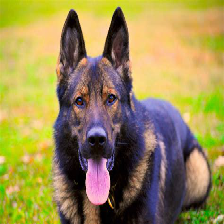

In [ ]:
image

In [ ]:
import numpy as np
np.array(image)

array([[[174, 193,  15],
        [170, 189,   9],
        [172, 191,  11],
        ...,
        [138, 146,  11],
        [136, 144,   9],
        [139, 147,  10]],

       [[169, 188,  10],
        [166, 185,   5],
        [167, 186,   6],
        ...,
        [137, 146,   3],
        [135, 144,   1],
        [138, 147,   2]],

       [[167, 186,   8],
        [163, 182,   4],
        [165, 184,   4],
        ...,
        [138, 146,   0],
        [136, 144,   0],
        [139, 147,   0]],

       ...,

       [[119, 158,   7],
        [136, 158,   0],
        [154, 160,   8],
        ...,
        [ 87,  91,  15],
        [ 78,  86,   3],
        [134, 139,  55]],

       [[113, 156,   6],
        [129, 155,   0],
        [146, 156,   0],
        ...,
        [ 73,  74,   0],
        [ 87,  90,   9],
        [154, 158,  74]],

       [[120, 147,  16],
        [139, 150,  30],
        [154, 150,  43],
        ...,
        [ 69,  82,   2],
        [ 85,  90,  23],
        [159, 159, 109]]

In [ ]:
image = np.reshape(a= image,newshape = (1,224,224,3))
image.shape

(1, 224, 224, 3)

In [ ]:
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
image_preprocessed = preprocess_input(image)
image_preprocessed

array([[[[ -88.939    ,   76.221    ,   50.32     ],
         [ -94.939    ,   72.221    ,   46.32     ],
         [ -92.939    ,   74.221    ,   48.32     ],
         ...,
         [ -92.939    ,   29.221    ,   14.32     ],
         [ -94.939    ,   27.221    ,   12.32     ],
         [ -93.939    ,   30.221    ,   15.32     ]],

        [[ -93.939    ,   71.221    ,   45.32     ],
         [ -98.939    ,   68.221    ,   42.32     ],
         [ -97.939    ,   69.221    ,   43.32     ],
         ...,
         [-100.939    ,   29.221    ,   13.32     ],
         [-102.939    ,   27.221    ,   11.32     ],
         [-101.939    ,   30.221    ,   14.32     ]],

        [[ -95.939    ,   69.221    ,   43.32     ],
         [ -99.939    ,   65.221    ,   39.32     ],
         [ -99.939    ,   67.221    ,   41.32     ],
         ...,
         [-103.939    ,   29.221    ,   14.32     ],
         [-103.939    ,   27.221    ,   12.32     ],
         [-103.939    ,   30.221    ,   15.32     ]],

In [ ]:
y_pred = model.predict(image_preprocessed)
y_pred

1/1 [==============================] - 1s 535ms/step


array([[5.93896184e-05, 3.22257605e-04, 7.34575267e-04, 1.66313350e-03,
        3.46743152e-04, 1.19359707e-02, 1.50643564e-05, 7.52004780e-05,
        5.62191242e-04, 1.95225963e-04, 4.66547848e-04, 4.69557039e-04,
        1.20159093e-05, 4.17704199e-04, 3.24185676e-04, 5.56600680e-05,
        1.66751925e-04, 2.46461714e-04, 1.57707464e-03, 2.62832735e-03,
        1.87768019e-04, 4.67168065e-05, 8.34853016e-03, 1.92018721e-04,
        3.28812312e-05, 1.44156395e-03, 5.30490206e-06, 4.17359639e-03,
        1.57674789e-04, 7.10649882e-04, 8.66338087e-04, 1.07398862e-03,
        1.69626743e-04, 6.41046208e-04, 2.91331147e-04, 5.79427870e-04,
        5.16871747e-04, 8.66992690e-04, 3.59800499e-04, 4.74342320e-04,
        1.92750667e-04, 1.02989993e-03, 3.73664603e-04, 2.57706223e-03,
        4.52913780e-04, 7.33346042e-06, 2.20710863e-04, 2.28764737e-04,
        4.49018000e-04, 2.23221941e-04, 8.19468914e-05, 5.28913573e-04,
        3.02183355e-04, 4.24113750e-05, 1.81209922e-04, 3.935754

In [ ]:
from keras.applications.imagenet_utils import decode_predictions

In [ ]:
decode_predictions(y_pred)

[[('n01797886', 'ruffed_grouse', 0.058247063),
  ('n04328186', 'stopwatch', 0.046606697),
  ('n03594945', 'jeep', 0.02712262),
  ('n02802426', 'basketball', 0.02498081),
  ('n03180011', 'desktop_computer', 0.016652664)]]